In [3]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import os
from IPython.display import clear_output
import random

In [4]:
#This came from GitHub (https://gist.github.com/botforge/64cbb71780e6208172bbf03cd9293553)
def save_frames_as_gif(frames,episode, algorithm_type, path='./Algorithm_Animations', filename='gym_animation.gif'):
    #Mess with this to change frame size
    print(frames[0].shape)
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72)

    patch = plt.imshow(frames[0])
    plt.axis('off')
    plt.title(f"Run from episode {episode} {algorithm_type}")

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    anim.save(path + filename, writer='imagemagick', fps=30)

MovieWriter imagemagick unavailable; using Pillow instead.


(240, 720, 3)


FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado: 'f:\\acceso\\7.- septimo semestre\\Inteligencia artificial I\\SIS420-012024\\Laboratorios\\Laboratorio 7\\CliffWalking V1\\Algorithm_Animations'

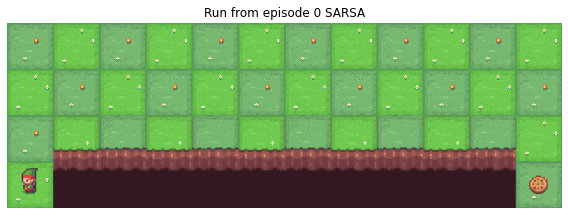

In [5]:
#SARSA (On-Policy TD Control) for estimating Q
env = gym.make('CliffWalking-v0',render_mode="rgb_array")
observation,info = env.reset()
#print(env.action_space.n)
#print(env.observation_space)
action = env.action_space.sample()
# initialize constants
EPSILON = 0.01
ALPHA = 0.50
RENDER_AT_EPISODE = 10
EPISODES = 100
LEARNING_RATE = 0.99

#initialize for each state and action
episode_frames_SARSA = {}
previous_state_action_reward = {}
policy_given_state = {}
Q_table = np.random.rand(env.observation_space.n,env.action_space.n) #THIS NEEDS TO BE A TABLE FOR EACH STATE AND ACTION
Q_table[47] = np.zeros((1,env.action_space.n))

#initialize the policy
for interaction in range(Q_table.shape[0]):
        best_action = np.argmax(Q_table[interaction])
        policy_given_state[interaction] = np.ones((1,env.action_space.n))[0] * EPSILON/env.action_space.n
        policy_given_state[interaction][best_action] = 1-EPSILON+(EPSILON/env.action_space.n)
#SANITY CHECK
for row in policy_given_state.keys():
    #print(policy_given_state[row])
    np.random.choice([0,1,2,3],p=policy_given_state[row])
time_step=0
C = 0
number_time_step = []
for episode in range(EPISODES): #for each episode
    if episode%10_000 == 0:
        print(f"Currently on episode {episode}")
    frames=[]
    observation,info = env.reset() #initialize the environment
    #This is the epsilon greedy method
    if random.random() < EPSILON:
        action = random.randint(0,env.action_space.n-1)
    else: 
        action = np.argmax(Q_table[observation])
    done=False
    while not done: #for each time step
        next_observation, reward, done, truncated,info = env.step(action) #take an action and get feedback from the environment

        if random.random() < EPSILON:
            next_action = random.randint(0,env.action_space.n-1)
        else: 
            next_action = np.argmax(Q_table[next_observation])

        Q_table[observation][action] = Q_table[observation][action] + ALPHA*(reward + LEARNING_RATE*Q_table[next_observation][next_action] - Q_table[observation][action])
        observation = next_observation
        action = next_action
        time_step+=1
        if episode%RENDER_AT_EPISODE == 0:
            clear_output(wait=True)
            single_frame = env.render()
            frames.append(single_frame)
            #plt.imshow(single_frame)
            #plt.axis("off")
            #plt.title(f"Run from episode {episode} (SARSA)")
            #plt.show()
        
    if episode%RENDER_AT_EPISODE ==0:
        frames.append(single_frame)
        frames.append(single_frame)
        frames.append(single_frame)
        frames.append(single_frame)
        episode_frames_SARSA[episode] = frames
        save_frames_as_gif(frames,episode,"SARSA",filename=f"SARSA episode {episode}.gif")
    
    number_time_step.append(time_step)

In [ ]:
# THIS IS FOR Q-LEARNING
env = gym.make('CliffWalking-v0',render_mode="rgb_array")

ALPHA = 0.85
EPSILON = 0.1
RENDER_AT_EPISODE = 10
EPISODES = 100
LEARNING_RATE = 0.99
alpha = np.linspace(0.01,0.99,10)
learning_rate= np.linspace(0.01,0.99,10)

episode_frames_Q = {}
time_step=0
sum_of_rewards = {}

Q_table = np.zeros((env.observation_space.n,env.action_space.n)) #THIS NEEDS TO BE A TABLE FOR EACH STATE AND ACTION
for episode in range(EPISODES): #for each episode
    observation,info = env.reset() #initialize the environment
    done=False
    rewards = 0
    frames=[]
    while not done: #for each time step
        # SELECT AN ACTION USING EPSILON GREEDY METHOD
        #if random.random() < EPSILON:
        #    action = random.randint(0,env.action_space.n-1)
        #else: 
        action = np.argmax(Q_table[observation])

        next_observation, reward, done, truncated,info = env.step(action) #take an action and get feedback from the environment
        Q_table[observation][action] = Q_table[observation][action] + ALPHA*(reward + LEARNING_RATE*np.max(Q_table[next_observation]) - Q_table[observation][action])
        observation = next_observation
        time_step+=1
        rewards+=reward
        if episode%RENDER_AT_EPISODE == 0:
            clear_output(wait=True)
            single_frame = env.render()
            frames.append(single_frame)
            plt.imshow(single_frame)
            plt.show()
    sum_of_rewards[episode] = rewards
    if episode%RENDER_AT_EPISODE == 0:
        frames.append(single_frame)
        frames.append(single_frame)
        episode_frames_Q[episode] = frames
        save_frames_as_gif(frames,episode,"Q-Learning",filename=f"Q-Learning episode {episode}.gif")
    